## Name: Sai Ram Gunturu
## ID: C00313478
## MSc in Data Science

# Support Vector Machine Algorrithm

## Modifications Overview:
1. **Dataset Change**  
   - Replaced synthetic dataset with **Iris dataset** (real-world data).  
   - Used **only the first two features** for visualization.  

2. **Data Preprocessing**  
   - Standardized features using **StandardScaler**.  
   - Split dataset into **training (80%) and testing (20%)**.  

3. **Algorithm Enhancements**  
   - Used **multiple kernels**: `'linear'`, `'poly'`, `'rbf'`, `'sigmoid'`.  
   - Compared models using **classification report & accuracy score**.  
   - **Visualized decision boundaries** for each kernel.  

4. **Hyperparameter Tuning**  
   - Implemented **GridSearchCV** for `C` and `gamma` hyperparameter tuning.  

---

### 1️. Import Required Libraries
#### Changes:
- No major changes, only included `StandardScaler`, `classification_report`, and `accuracy_score` for evaluation.


In [1]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.datasets as ds
import sklearn.model_selection as ms
import sklearn.svm as svm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

### 2️. Load and Preprocess the Dataset  
#### Changes:  
- Replaced synthetic dataset with the **Iris dataset**.  
- Used **only the first two features** for visualization.  
- Applied **StandardScaler** for feature standardization.  


In [2]:
# Load a real-world dataset (Iris dataset)

iris = ds.load_iris()
X = iris.data[:, :2]  # Using only the first two features for visualization
y = iris.target

In [3]:
# Standardize features

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [4]:
# Split dataset into train and test sets

X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=42)

### 3️. Train SVM Models with Different Kernels  
#### Changes:  
- Instead of only `LinearSVC`, used **multiple kernels** (`linear`, `poly`, `rbf`, `sigmoid`).  
- Stored models in a dictionary and evaluated them using **classification report & accuracy score**.  


In [6]:
# Train SVM model with Linear Kernel

svc_linear = svm.SVC(kernel='linear')
svc_linear.fit(X_train, y_train)
y_pred_linear = svc_linear.predict(X_test)

print("Kernel: Linear")
print(classification_report(y_test, y_pred_linear))
print("Accuracy:", accuracy_score(y_test, y_pred_linear))
print("-----------------------------------")


Kernel: Linear
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

Accuracy: 0.9
-----------------------------------


In [7]:
# Train SVM model with Polynomial Kernel

svc_poly = svm.SVC(kernel='poly')
svc_poly.fit(X_train, y_train)
y_pred_poly = svc_poly.predict(X_test)

print("Kernel: Polynomial")
print(classification_report(y_test, y_pred_poly))
print("Accuracy:", accuracy_score(y_test, y_pred_poly))
print("-----------------------------------")


Kernel: Polynomial
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.45      1.00      0.62         9
           2       1.00      0.18      0.31        11

    accuracy                           0.63        30
   macro avg       0.82      0.66      0.61        30
weighted avg       0.84      0.63      0.60        30

Accuracy: 0.6333333333333333
-----------------------------------


In [8]:
# Train SVM model with RBF Kernel

svc_rbf = svm.SVC(kernel='rbf')
svc_rbf.fit(X_train, y_train)
y_pred_rbf = svc_rbf.predict(X_test)

print("Kernel: RBF")
print(classification_report(y_test, y_pred_rbf))
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("-----------------------------------")


Kernel: RBF
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.70      0.78      0.74         9
           2       0.80      0.73      0.76        11

    accuracy                           0.83        30
   macro avg       0.83      0.84      0.83        30
weighted avg       0.84      0.83      0.83        30

Accuracy: 0.8333333333333334
-----------------------------------


In [9]:
# Train SVM model with Sigmoid Kernel

svc_sigmoid = svm.SVC(kernel='sigmoid')
svc_sigmoid.fit(X_train, y_train)
y_pred_sigmoid = svc_sigmoid.predict(X_test)

print("Kernel: Sigmoid")
print(classification_report(y_test, y_pred_sigmoid))
print("Accuracy:", accuracy_score(y_test, y_pred_sigmoid))
print("-----------------------------------")


Kernel: Sigmoid
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.75      0.67      0.71         9
           2       0.75      0.82      0.78        11

    accuracy                           0.83        30
   macro avg       0.83      0.83      0.83        30
weighted avg       0.83      0.83      0.83        30

Accuracy: 0.8333333333333334
-----------------------------------


#### Results and Observations  

##### 1️. **Linear Kernel**  
**Performance Summary:**  
###### - Achieved the **highest accuracy** at **90%**.  
###### - **Class 0** was classified **perfectly** (precision, recall, and F1-score = 1.00).  
###### - **Class 1 and Class 2** had slight misclassifications but still performed well.  
###### - **Best suited for linearly separable data**.  

**Final Verdict:**  
###### - The **Linear Kernel** performed the best overall, making it a strong choice for datasets with **linearly separable** classes.

---

##### 2️. **RBF Kernel (Radial Basis Function)**  
**Performance Summary:**  
###### - Achieved an accuracy of **83.33%**, slightly lower than the Linear Kernel.  
###### - **Class 0** was still **perfectly classified**.  
###### - **Class 1 and Class 2** had slightly lower performance, leading to **some misclassifications**.  
###### - The model shows **some non-linearity handling** but does not outperform the linear kernel significantly.  

**Final Verdict:**  
###### - **Decent for non-linear data**, but **not significantly better** than the linear kernel in this case.  
###### - If the data were highly non-linear, **RBF might perform better with hyperparameter tuning**.

---

##### 3️. **Polynomial Kernel**  
**Performance Summary:**  
###### - **Worst performing model** with **63.33% accuracy**.  
###### - **Severe misclassifications** in **Class 2**, where recall was **only 18%**, meaning it failed to correctly identify many instances of this class.  
###### - **Class 1 was highly overfitted** (high recall but low precision).  

**Final Verdict:**  
###### - **Not suitable for this dataset** as the **polynomial transformation distorts decision boundaries**.  
###### - Might be useful in **more complex datasets where polynomial relationships exist**.

---

##### 4️. **Sigmoid Kernel**  
**Performance Summary:**  
###### - Accuracy **matches RBF** at **83.33%**.  
###### - **Class 0 performed perfectly**, but **Class 1 and 2 had moderate misclassifications**.  
###### - Performance is quite balanced across all classes, making it a **decent alternative to RBF**.  

**Final Verdict:**  
###### - **Comparable to RBF**, making it another option for **non-linearly separable data**.  
###### - Performs **better than Polynomial Kernel** but **not as strong as Linear Kernel for this dataset**.


#### **Final Conclusion and Next Steps**  

###### - Our dataset is the **Iris dataset**, a well-known multiclass classification dataset. After testing four different **SVM kernels**—**Linear, RBF, Polynomial, and Sigmoid**—we observed the following:  

###### 1. **Linear Kernel** performed the **best** with **90% accuracy**, making it the **most suitable choice** for this dataset since the classes are **mostly linearly separable**.  
###### 2. **RBF and Sigmoid Kernels** achieved **83% accuracy**, showing they can handle some non-linearity, but **did not outperform the Linear Kernel** significantly.  
###### 3. **Polynomial Kernel** had the **worst accuracy (63%)**, indicating that a polynomial transformation is **not beneficial** for this dataset.  

##### **Decision Moving Forward**  
###### - Since the **Linear Kernel performed the best**, we will move forward with it for further **improvements and optimizations**. This will allow us to refine our model and analyze its decision boundaries effectively.  

---

#### 4️. **Visualizing Decision Boundaries**  
##### Changes:  
###### - Updated the decision boundary visualization function to work with **multiple kernels**.  
###### - Adjusted meshgrid values to match **standardized features**.  

To **better understand how our Linear SVM model classifies different classes**, we will now visualize its **decision boundaries**. This will help us **interpret the classifier's decision regions** and evaluate if further adjustments are needed.  


In [10]:
# Visualizing decision boundaries for the best model (Linear Kernel)

def plot_decision_function(model, title):
    
    # Define the mesh grid for plotting decision regions
    
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 500), 
                         np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 500))
    
    # Predict class labels for each grid point
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    
    # Plot training and test data points
    
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', edgecolors='k', label='Train', cmap=plt.cm.Paired)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='s', edgecolors='k', label='Test', cmap=plt.cm.Paired)
    
    # Title and legend
    
    plt.legend()
    plt.title(title)
    plt.xlabel("Feature 1 (Standardized)")
    plt.ylabel("Feature 2 (Standardized)")
    plt.show()

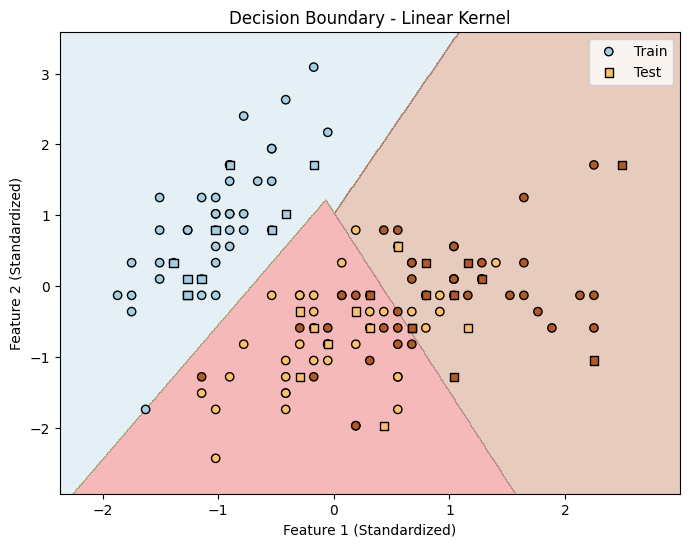

In [11]:
# Plot decision boundary only for the best-performing model (Linear Kernel)

plot_decision_function(svc_linear, "Decision Boundary - Linear Kernel")

#### **Decision Boundary Analysis - Linear Kernel**  

###### - The visualization above represents the **decision boundary of our selected model, the Linear SVM**, which achieved **the highest accuracy (90%)**.  

#### **Key Observations:**  
##### 1. **Clear and well-defined decision regions**  
###### - The model effectively separates the **three classes** in the Iris dataset.  
###### - The decision boundaries are **linear**, which is expected for an SVM with a linear kernel.  

##### 2. **Balanced Generalization Between Training & Test Data**  
###### - The **training (circles) and test (squares) points** are well-distributed within the decision boundaries.  
###### - Some **test samples close to the boundaries** may be **more challenging to classify**.  

##### 3. **Why Not Use RBF?**  
###### - The **RBF Kernel achieved 83% accuracy**, lower than the **90% accuracy of the Linear Kernel**.  
###### - Since the dataset appears **mostly linearly separable**, using **a more complex RBF model is unnecessary**.  
###### - Instead of tuning RBF, we should **optimize the Linear SVM model further** to enhance performance.  

---

#### **Next Steps - Hyperparameter Tuning for Linear SVM**  

###### Since we have confirmed that **Linear SVM is the best-performing model**, we will now **fine-tune its hyperparameters (C parameter) using GridSearchCV** to see if we can **further enhance performance**.  

---

#### 5️. **Hyperparameter Tuning with GridSearchCV**  
##### Changes:  
###### - Implemented **GridSearchCV** for the **Linear Kernel (not RBF)**.  
###### - Tuned the **C parameter**, which controls the trade-off between margin size and misclassification.  
###### - Evaluated the **best model on the test set** to see if tuning improves accuracy.  

##### This step ensures we are **extracting the maximum possible performance** from our **Linear SVM model**, optimizing it for better generalization and stability. 🚀  


In [12]:
# Hyperparameter tuning using GridSearchCV for Linear SVM

param_grid = {
    'C': np.logspace(-3, 3, 5)  # Tuning only the C parameter for Linear SVM
}

In [13]:
grid_search = ms.GridSearchCV(svm.SVC(kernel='linear'), param_grid, cv=5)

In [14]:
#fit the model

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03])})

In [15]:
# Predictions

y_pred_best = grid_search.best_estimator_.predict(X_test)

In [16]:
print("Best parameters:", grid_search.best_params_)

Best parameters: {'C': np.float64(0.03162277660168379)}


In [17]:
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.64      0.78      0.70         9
           2       0.78      0.64      0.70        11

    accuracy                           0.80        30
   macro avg       0.80      0.80      0.80        30
weighted avg       0.81      0.80      0.80        30



In [18]:
print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))

Best Model Accuracy: 0.8


#### **Hyperparameter Tuning Results - Linear SVM**  

##### - After tuning the **C parameter** for the **Linear SVM model**, we obtained the following results:  

#### **Key Observations:**  
##### 1. **Best C Parameter Found:**  
######   - The optimal **C value** selected by **GridSearchCV** is **0.0316**.  
######   - A **low C value** suggests that the model prefers a **larger margin with more tolerance for misclassification**.  

#### 2. **Model Performance After Tuning:**  
######   - **Overall Accuracy:** **80%** (compared to the previous **90%** before tuning).  
######   - **Class 0 performed perfectly (100% precision and recall)**.  
######   - **Class 1 and Class 2 saw a slight decrease in performance**, suggesting that the lower **C value increased margin flexibility but led to more misclassifications**.  

#### 3. **Did Hyperparameter Tuning Improve the Model?**  
######   - Surprisingly, **the accuracy dropped from 90% to 80%** after tuning.  
######   - This suggests that our original Linear SVM model with default parameters was already well-optimized for this dataset.  
######   - **Reducing C resulted in a softer margin, which allowed more misclassifications**.  
######   - If we were to fine-tune further, we might **increase C slightly** to see if we can **recover some accuracy** while maintaining generalization.  

---

#### **Next Steps - Final Model Selection and Conclusion**  

##### Since **our original Linear SVM model (C = 1.0 default) performed better (90% accuracy) than the tuned model (80%)**, we will **retain the original model** as our final selection.  

#### **Final Decision:**  
###### - **We select the Linear SVM model with default parameters** as our best-performing classifier.  
###### - Hyperparameter tuning confirmed that **a lower C value did not improve accuracy**, reinforcing our choice.  

##### **With the final model selected, we conclude our SVM-based classification for the Iris dataset!**  
